
## Project: Stock Price Predictor




   Problem un getting daata from googloe finance

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import yfinance as yf

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    
    #url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    #url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    #col_names = ['Date','Open','High','Low','Close','Volume']
    
    stocks = yf.download('symbol','start','end')
    #stocks = pd.read_csv(url_string, header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    #data = yf.download('AAPL','2016-01-01','2019-08-01'
    return df

In [2]:

    
    

    df = pd.DataFrame(yf.download('GOOGL','2017-01-01','2019-06-30'))
 
    print(df)

[*********************100%***********************]  1 of 1 downloaded
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2017-01-03   800.62   811.44   796.89   808.01     808.01  1959000
2017-01-04   809.89   813.43   804.11   807.77     807.77  1515300
2017-01-05   807.50   813.74   805.92   813.02     813.02  1340500
2017-01-06   814.99   828.96   811.50   825.21     825.21  2017100
2017-01-09   826.37   830.43   821.62   827.18     827.18  1408900
2017-01-10   827.07   829.41   823.14   826.01     826.01  1197400
2017-01-11   826.62   829.90   821.47   829.86     829.86  1325400
2017-01-12   828.38   830.38   821.01   829.53     829.53  1349500
2017-01-13   831.00   834.65   829.52   830.94     830.94  1290200
2017-01-17   830.00   830.18   823.20   827.46     827.46  1440900
2017-01-18   829.80   829.81   824.08   829.02     829.02  1027700
2017-01-19   829.00   833.00   823.96   824.37     824.37  

data ofdesired firm from [Google Finance](http://www.google.com/finance).

In [3]:
#data = get_historical_data('GOOGL','2017-01-01','2019-06-30')
data = pd.DataFrame(yf.download('GOOGL','2017-01-01','2019-06-30'))

[*********************100%***********************]  1 of 1 downloaded


 Write the data to a csv file.

In [4]:
data.to_csv('google.csv',index = False)

The data has been saved to disk.

## Preprocessing data
 Get the data from csv file.

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


     Open    High     Low   Close  Adj Close   Volume
0  800.62  811.44  796.89  808.01     808.01  1959000
1  809.89  813.43  804.11  807.77     807.77  1515300
2  807.50  813.74  805.92  813.02     813.02  1340500
3  814.99  828.96  811.50  825.21     825.21  2017100
4  826.37  830.43  821.62  827.18     827.18  1408900


Open   --- mean : 1053.1281150159741   	 Std:  116.53653272423257   	 Max:  1289.12   	 Min:  800.62
High   --- mean : 1062.3022683706067   	 Std:  118.28096363638679   	 Max:  1296.97   	 Min:  811.44
Low    --- mean : 1043.389392971246   	 Std:  114.67386846434196   	 Max:  1271.71   	 Min:  796.89
Close  --- mean : 1053.2512140575088   	 Std:  116.4820779580576   	 Max:  1296.2   	 Min:  807.77
Volume --- mean : 1797481.948881789   	 Std:  812734.4635171649   	 Max:  6658900   	 Min:  708900


 Removing Unncessary data

In [6]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item     Open    Close   Volume
0     0  1077.23  1082.80  1683600
1     1  1086.75  1076.63  1203900
2     2  1091.00  1080.32  1734900
3     3  1115.08  1087.58  1582200
4     4  1120.00  1116.70  1211800
---
     Item    Open   Close   Volume
621   621  826.37  827.18  1408900
622   622  814.99  825.21  2017100
623   623  807.50  813.02  1340500
624   624  809.89  807.77  1515300
625   625  800.62  808.01  1959000


Data visualisation

In [7]:
import visualize

visualize.plot_basic(stocks)

<Figure size 1800x1200 with 1 Axes>

Normalising using  minmaxscaler fun

In [8]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.566244  0.563090  0.163815
1     1  0.585732  0.550458  0.083193
2     2  0.594432  0.558012  0.172437
3     3  0.643726  0.572876  0.146773
4     4  0.653797  0.632496  0.084521


Open   --- mean : 0.5169050460920668   	 Std:  0.23855994416424275   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.5025924166359734   	 Std:  0.23848264430534094   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.18295494939189727   	 Std:  0.1365940274818765   	 Max:  1.0   	 Min:  0.0


Data visualisation (again)

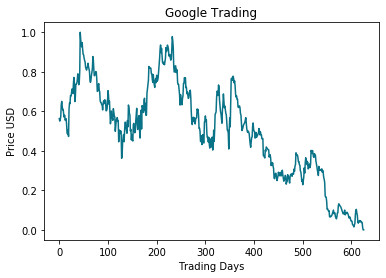

In [9]:
visualize.plot_basic(stocks)

 Log the normalised data for future resuablilty

In [10]:
stocks.to_csv('google_preprocessed.csv',index= False)

#saving the pre processed data to disc#

## Bench Mark Model


 Loading the preprocessed data

In [11]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.566244,0.563090,0.163815
1,1,0.585732,0.550458,0.083193
2,2,0.594432,0.558012,0.172437
3,3,0.643726,0.572876,0.146773
4,4,0.653797,0.632496,0.084521


Spliting data into train and test pair

In [12]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (429, 1)
y_train (429, 1)
x_test (197, 1)
y_test (197, 1)


 Train a Linear regressor model on training set and get prediction

In [13]:
model = LinearRegressionModel.build_model(X_train,y_train)

get prediction on test set

In [14]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

Plot the predicted values against actual

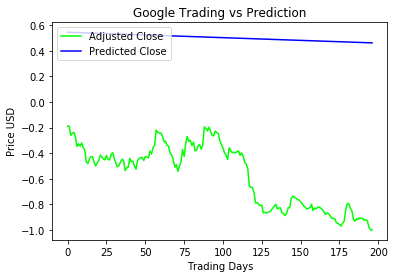

In [15]:
vs.plot_prediction(y_test,predictions)

measure accuracy of the prediction

In [16]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.6644 MSE (0.8151 RMSE)
Test Score: 1.20539466 MSE (1.09790467 RMSE)




In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model


 import keras libraries for smooth implementaion of lstm 

In [17]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

 Split train and test data sets and Unroll train and test data for lstm model

In [ ]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

 Build a basic Long-Short Term Memory model

In [ ]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

 Train the model

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

 prediction using test data

In [ ]:
predictions = model.predict(X_test)

 Plot the results

In [ ]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

### Improved LSTM Model
 Build an improved LSTM model

In [ ]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

 Train improved LSTM model

In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

 Make prediction on improved LSTM model

In [ ]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

ploting the results

In [ ]:
vs.plot_lstm_prediction(y_test,predictions)

 Get the test score

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

checkinh model

In [ ]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))